

* face_recognition 은 안면을 인식하는 심플한 API for Python.
* face_recognition 패키지는 정확도면에서 한계가 있다.
* 실전에서는 face landmark를 활용한 이미지 전처리 과정(Alignment) 등을 통해 정확도를 높이고 있다.
* 동양인들 끼리의 얼굴 인식은 잘 안 된다.

In [1]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# cmake install
!pip install cmake

In [3]:
# dlib install
!pip install dlib

In [4]:
# face_recognition install
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 15 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=f4314d52253367a4d92b6df0ffe9a99a7da11bf310b101392932837fb890160e
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [5]:
# 필요한 패키지와 모듈을 불러옴
import cv2
from google.colab.patches import cv2_imshow
import face_recognition
import pickle
import time

In [6]:
image_file = '/content/gdrive/MyDrive/Face_Recognition/image/queen.jpg'         # 원본 이미지
encoding_file = '/content/gdrive/MyDrive/Face_Recognition/encodings.pickle'  # 저장해 두었던 특성 파일
unknown_name = 'Unknown'                                                # 이름을 모를 경우 Unknown 으로 지정
# Either cnn  or hog. The CNN method is more accurate but slower. HOG is faster but less accurate.
model_method = 'cnn'

In [7]:
def detectAndDisplay(image):
    start_time = time.time()
    # 이미지를 face_recognition 에서 처리하기 위해 RGB 형식으로 변경
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 얼굴을 detection 하고 boxing 한다.
    boxes = face_recognition.face_locations(rgb, model=model_method)
    # 얼굴 영역(boxing Area)만 encoding(특성값)을 계산한다.
    encodings = face_recognition.face_encodings(rgb, boxes)

    # detection 된 얼굴의 이름을 저장할 배열
    names = []

    for encoding in encodings:
        # boxing 된 특성이 pickle 파일의 encodings(특성값) 과 매칭되는 것이 있는지 찾아낸다.
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        print(matches)
        name = unknown_name   # 'Unknown'으로 초기화

        # check to see if we have found a match
        if True in matches:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]  # 매칭된 pickle 파일의 True 인덱스 번호를 찾아온다.
            counts = {}    # 매칭된 얼굴별로 이름과 겹친 Count 수 를 Dictionary 타입으로 저장한다.  

            for i in matchedIdxs:
                name = data["names"][i]   # 매칭된 True 인텍스 번호의 "names" value 를 찾아온다.
                counts[name] = counts.get(name, 0) + 1  # counts dict의 "name" 키값의 value 에 count 누적

            name = max(counts, key=counts.get)   # counts dict에서 key값(이름)들 중에서 가장 value 값(카운팅)이 큰 key값(이름)을 가져옴

        # names 배열에 이름을 추가
        names.append(name)

    # dection 된 얼굴의 boxing 위치 좌표와 이름 매칭
    for ((top, right, bottom, left), name) in zip(boxes, names):
        color = (0, 255, 0)   # boxing color
        line = 2              # boxing line 두께  
        if(name == unknown_name):  # 만약 unknown 이라면 
            color = (0, 0, 255)  
            line = 1
            name = ''   # name 표시 안함      
            
        cv2.rectangle(image, (left, top), (right, bottom), color, line)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, line)

    end_time = time.time()
    process_time = end_time - start_time
    print("=== A frame took {:.3f} seconds".format(process_time))
    # show the output image
    cv2_imshow(image)

[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, False, False, False, False]
=== A frame took 2.874 seconds


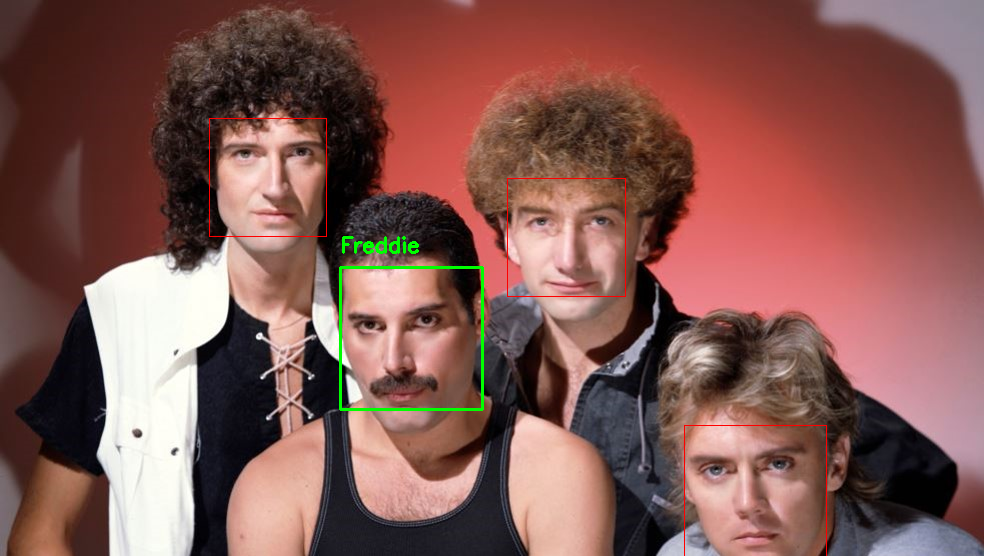

In [8]:
# 저장해 두었던 encodings(특성값) 파일을 불러온다.
data = pickle.loads(open(encoding_file, "rb").read())

# 원본 이미지를 읽어 온다.
image = cv2.imread(image_file)
detectAndDisplay(image)